In [99]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.image import imread
%matplotlib inline

In [100]:
my_data_dir="E:\\PROJECT\\CNN NEW DATASET\\cell_images"

In [101]:
os.listdir(my_data_dir) 

['test', 'train']

In [102]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [103]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [104]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [105]:
os.listdir(train_path+'\\parasitized')[0]

'aa.png'

In [106]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [107]:
para_img= imread(para_cell)

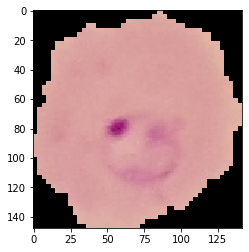

In [108]:
plt.imshow(para_img)

In [109]:
para_img.shape

(148, 142, 3)

In [110]:
os.listdir(train_path+'\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

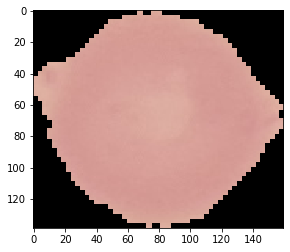

In [111]:
uninfected_cell = train_path+'\\uninfected'+'\\C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_img= imread(uninfected_cell)
plt.imshow(uninfected_img)

In [112]:
len(os.listdir(train_path+'\\parasitized'))

12481

In [113]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [114]:
para_img.shape

(148, 142, 3)

In [115]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

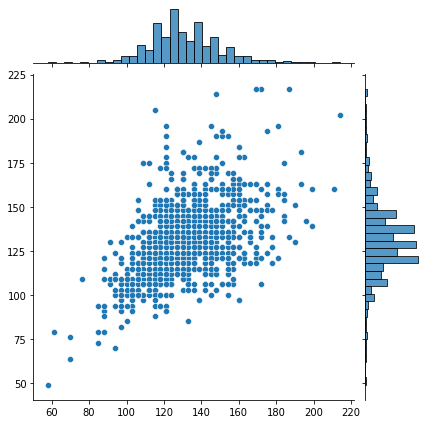

In [116]:
sns.jointplot(dim1,dim2)

In [117]:
np.mean(dim1)

130.92538461538462

In [118]:
np.mean(dim2)

130.75

In [119]:
image_shape = (130,130,3)

In [120]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [121]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

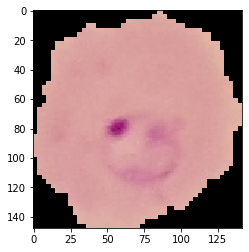

In [122]:
plt.imshow(para_img)

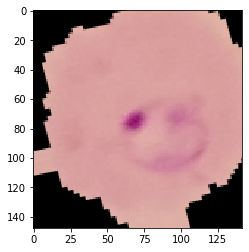

In [123]:
plt.imshow(image_gen.random_transform(para_img))

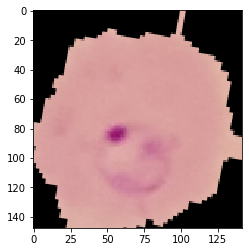

In [124]:
plt.imshow(image_gen.random_transform(para_img))

In [125]:
image_gen.flow_from_directory(train_path)

Found 24959 images belonging to 2 classes.


In [126]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [128]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [129]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [130]:
from tensorflow.keras.callbacks import EarlyStopping

In [131]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [132]:
batch_size = 16

In [133]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24959 images belonging to 2 classes.


In [134]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [135]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [136]:
#results = model.fit_generator(train_image_gen,epochs=20,
#                             validation_data=test_image_gen,
#                             callbacks=[early_stop])

In [137]:
from tensorflow.keras.models import load_model

In [138]:
model=load_model('malaria_detector.h5')

In [139]:
model.evaluate_generator(test_image_gen)

[0.2140177637124377, 0.93846154]

In [140]:
model.metrics_names

['loss', 'accuracy']

In [141]:
pred_probabilities = model.predict_generator(test_image_gen)

In [142]:
pred_probabilities

array([[0.0000000e+00],
       [4.1723251e-06],
       [0.0000000e+00],
       ...,
       [9.4244814e-01],
       [9.6315861e-01],
       [9.5290661e-01]], dtype=float32)

In [143]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [144]:
predictions = pred_probabilities > 0.5

In [145]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [146]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1300
           1       0.92      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [147]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1193,  107],
       [  58, 1242]], dtype=int64)

In [148]:
para_cell

'E:\\PROJECT\\CNN NEW DATASET\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [149]:
from tensorflow.keras.preprocessing import image

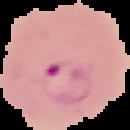

In [156]:
my_image = image.load_img(para_cell,target_size=image_shape) #input
my_image

In [157]:
my_image = image.img_to_array(my_image)

In [158]:
my_image = np.expand_dims(my_image, axis=0)

In [159]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [160]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

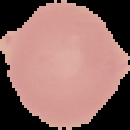

In [161]:
my_image = image.load_img(uninfected_cell,target_size=image_shape)  #input 
my_image

In [162]:
my_image = image.img_to_array(my_image)

In [163]:
my_image = np.expand_dims(my_image, axis=0)

In [164]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [165]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [173]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from PIL import Image, ImageTk
import tkinter.font as font
 
class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Python Tkinter Dialog Widget")
        self.minsize(640, 400)
        self.labelFrame = ttk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
        self.button()
        self.button1() 
 
    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)
  
    def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir =  "/PROJECT/test samples", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
        
        
        img = Image.open(self.filename)
        photo = ImageTk.PhotoImage(img)

        self.label2 = Label(image=photo)
        self.label2.image = photo 
        self.label2.grid(column=1, row=5)
 
    def button1(self):
        self.button = ttk.Button(self.labelFrame, text = "Submit", command = self.get_prediction)
        self.button.grid(column = 1, row = 20)
        
    def get_prediction(self):
        s=model.predict(my_image)
        if(s==[[1.]]):
            #self.label.configure(text="Non Parasitic")
            text = Label(self, text="Non Parasitic", font=("Helvetica", 17))
            text.place(x=50,y=200)
        else:
            #self.label.configure(text="Parasitic") 
            text = Label(self, text="Parasitic", font=("Helvetica", 17))
            text.place(x=70,y=200)
root = Root()
root.mainloop()